# Setting up PySpark in Colab

In [1]:
# Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, we download Java.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Download Apache Spark. You can find the link to the file at https://spark.apache.org/downloads.html 
!wget https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

--2021-12-01 03:12:05--  https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300965906 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.0-bin-hadoop3.2.tgz’

spark-3.2.0-bin-had 100%[===================>] 287.02M   165MB/s    in 1.7s    

2021-12-01 03:12:07 (165 MB/s) - ‘spark-3.2.0-bin-hadoop3.2.tgz’ saved [300965906/300965906]



In [3]:
# Unzip Apache Spark with Hadoop 3.2
!tar xvzf spark-3.2.0-bin-hadoop3.2.tgz

spark-3.2.0-bin-hadoop3.2/
spark-3.2.0-bin-hadoop3.2/NOTICE
spark-3.2.0-bin-hadoop3.2/kubernetes/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/python_executable_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/autoscale.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning_cleanup.py
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/decom.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.2.0-bin-hadoop3.2/kubernetes/docker

In [4]:
!ls /content/spark-3.2.0-bin-hadoop3.2

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [5]:
# Set the ‘environment’ path
import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [6]:
# Install and import the ‘findspark’ library that will locate Spark on the system and import it as a regular library
!pip install -q findspark

import findspark
findspark.init()

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master("local[*]")\
    .appName("final-project")\
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

In [8]:
sc

<SparkContext master=local[*] appName=final-project>

# Loading Data

In [9]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!ls "/content/drive/MyDrive/CS-GY 6513/Final Project"

'Big Data Project Proposal.pdf'   fire_nrt_M-C61_234859.csv
 DL_FIRE_J1V-C2_234860.zip	  fire_nrt_SV-C2_234861.csv
 DL_FIRE_M-C61_234859.zip	  license.txt
 DL_FIRE_SV-C2_234861.zip	  Readme.txt
 fire_archive_M-C61_234859.csv	  simplemaps_uscities_basicv1.74.zip
 fire_archive_SV-C2_234861.csv	  uscities.csv
 fire_nrt_J1V-C2_234860.csv	  uscities.xlsx


In [11]:
# Load fire data
rawData = spark\
    .read\
    .option("inferSchema", "true")\
    .option("header", "true")\
    .format("csv")\
    .load("/content/drive/MyDrive/CS-GY 6513/Final Project/fire_archive_M-C61_234859.csv")

# Exploratory Data Analysis

## Data Overview

In [12]:
rawData.show()
rawData.printSchema()

+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+----+--------+----+
|latitude|longitude|brightness|scan|track|  acq_date|acq_time|satellite|instrument|confidence|version|bright_t31| frp|daynight|type|
+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+----+--------+----+
| 38.5422| -78.3047|     304.8| 2.8|  1.6|2000-11-01|     250|    Terra|     MODIS|        23|   6.03|     280.9|40.3|       N|   0|
| 38.5586|  -78.317|     302.3| 2.8|  1.6|2000-11-01|     250|    Terra|     MODIS|        45|   6.03|     279.8|36.0|       N|   0|
| 38.5451| -78.3107|     309.9| 2.8|  1.6|2000-11-01|     250|    Terra|     MODIS|        79|   6.03|     280.7|58.8|       N|   0|
| 38.5563| -78.3084|     309.4| 2.8|  1.6|2000-11-01|     250|    Terra|     MODIS|        70|   6.03|     280.4|54.5|       N|   0|
| 31.3393| -89.9124|     304.9| 1.0|  1.0|2000-11-01|     427|    Ter

Data attribute fields: 
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes

In [13]:
# import functions
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window

In [15]:
# Add a column acq_year acq_month, acq_hour; cast column types
hotspotData = rawData\
    .withColumn("year", split(col("acq_date"), "-")[0].cast(IntegerType()))\
    .withColumn("month", split(col("acq_date"), "-")[1].cast(IntegerType()))\
    .withColumn("day", split(col("acq_date"), "-")[2].cast(IntegerType()))\
    .withColumn("acq_time", col("acq_time").cast(StringType()))\
    .withColumn("hour", expr("substring(acq_time, 1, length(acq_time) - 2)").cast(IntegerType()))\
    .select("latitude", "longitude", "brightness", "year", "month","day","hour", "frp", "type")

In [16]:
hotspotData.show()
hotspotData.printSchema()

+--------+---------+----------+----+-----+---+----+----+----+
|latitude|longitude|brightness|year|month|day|hour| frp|type|
+--------+---------+----------+----+-----+---+----+----+----+
| 38.5422| -78.3047|     304.8|2000|   11|  1|   2|40.3|   0|
| 38.5586|  -78.317|     302.3|2000|   11|  1|   2|36.0|   0|
| 38.5451| -78.3107|     309.9|2000|   11|  1|   2|58.8|   0|
| 38.5563| -78.3084|     309.4|2000|   11|  1|   2|54.5|   0|
| 31.3393| -89.9124|     304.9|2000|   11|  1|   4| 8.5|   0|
| 31.8611| -95.2398|     308.3|2000|   11|  1|   4|13.1|   0|
| 31.8636|  -95.226|     308.6|2000|   11|  1|   4|13.4|   0|
| 32.6448| -94.6467|     303.3|2000|   11|  1|   4| 7.4|   0|
| 36.6376| -83.9651|     307.6|2000|   11|  1|   4|39.6|   0|
| 36.6431| -83.9605|     309.4|2000|   11|  1|   4|44.2|   0|
| 36.5423| -83.8422|     306.7|2000|   11|  1|   4|40.9|   0|
| 36.7139| -84.2139|     302.4|2000|   11|  1|   4|32.1|   0|
| 36.7099| -84.2202|     300.9|2000|   11|  1|   4|29.2|   0|
|  41.63

In [17]:
# According to the descriptions of the attribute fields
# type column has four different values
# 0 = presumed vegetation fire
# 1 = active volcano
# 2 = other static land source
# 3 = offshore detection (includes all detections over water)

# Let's see the distribution of this field
typeCount = hotspotData\
    .groupBy("type")\
    .count()\
    .orderBy("Type")\
    .show()

+----+-------+
|type|  count|
+----+-------+
|   0|2310297|
|   1|  64715|
|   2| 107328|
|   3|   1900|
+----+-------+



In [18]:
# We will focus on fire data
fireData = hotspotData\
    .where(col("type") == 0)

fireData.show()

+--------+---------+----------+----+-----+---+----+----+----+
|latitude|longitude|brightness|year|month|day|hour| frp|type|
+--------+---------+----------+----+-----+---+----+----+----+
| 38.5422| -78.3047|     304.8|2000|   11|  1|   2|40.3|   0|
| 38.5586|  -78.317|     302.3|2000|   11|  1|   2|36.0|   0|
| 38.5451| -78.3107|     309.9|2000|   11|  1|   2|58.8|   0|
| 38.5563| -78.3084|     309.4|2000|   11|  1|   2|54.5|   0|
| 31.3393| -89.9124|     304.9|2000|   11|  1|   4| 8.5|   0|
| 31.8611| -95.2398|     308.3|2000|   11|  1|   4|13.1|   0|
| 31.8636|  -95.226|     308.6|2000|   11|  1|   4|13.4|   0|
| 32.6448| -94.6467|     303.3|2000|   11|  1|   4| 7.4|   0|
| 36.6376| -83.9651|     307.6|2000|   11|  1|   4|39.6|   0|
| 36.6431| -83.9605|     309.4|2000|   11|  1|   4|44.2|   0|
| 36.5423| -83.8422|     306.7|2000|   11|  1|   4|40.9|   0|
| 36.7139| -84.2139|     302.4|2000|   11|  1|   4|32.1|   0|
| 36.7099| -84.2202|     300.9|2000|   11|  1|   4|29.2|   0|
| 38.446

## Fire Frequency Change Analysis

+----+------+
|year| count|
+----+------+
|2000|  3398|
|2001| 39949|
|2002| 72874|
|2003|104785|
|2004|149663|
|2005|159473|
|2006|118363|
|2007|132788|
|2008|110915|
|2009|109804|
|2010| 90641|
|2011|116757|
|2012|128176|
|2013| 92823|
|2014| 89444|
|2015|136586|
|2016|102638|
|2017|141237|
|2018|119196|
|2019|101971|
|2020|148412|
|2021| 40404|
+----+------+



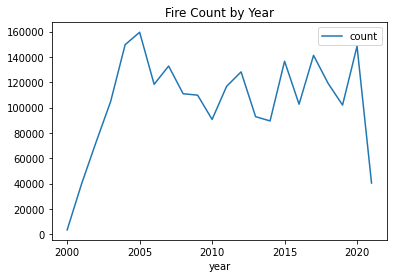

In [19]:
# Analyze fire frequency change across the US
# Fire frequency by year; 
# For Year 2000, we only have data for Nov and Dec
# For Year 2021, we only have data for Jan through Apr
fireByYear = fireData\
    .groupBy("year")\
    .count()\
    .orderBy("year")

fireByYear.show(22)

# Visualization of fire frequency by year
import pandas as pd
import matplotlib.pyplot as plt

pdDF1 = fireByYear.toPandas()
pdDF1.plot(kind = 'line',
           x = 'year',
           y = 'count',
           title = 'Fire Count by Year')



+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|month|2000|2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014| 2015| 2016| 2017| 2018| 2019| 2020| 2021|
+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    1|null|1286| 1151| 4537| 3778| 3856| 5463| 2651| 3649| 5634| 2682| 3821| 6894| 4174| 3876| 4549| 2368| 5266| 5226| 2771| 3784| 4280|
|    2|null|1809| 2597| 2988| 4093| 4099| 6627| 8296| 6798| 8605| 3363| 7808| 4699| 4763| 4656| 6071| 9088|10131| 3972| 2434| 5263| 4462|
|    3|null|2627| 1889| 7822|14116|11602|13204|13465|12257|12254|13073|12963|13071|12313|12648|11421|13678|14155|15482|11857| 9935|16438|
|    4|null|4258| 3477|12921|11076|13801|12797| 9936|13670|16587|14986|17338| 7420| 7178|12875| 8932|14425|11172|13494|10495| 9693|15224|
|    5|null|2613| 3848| 3230| 4207

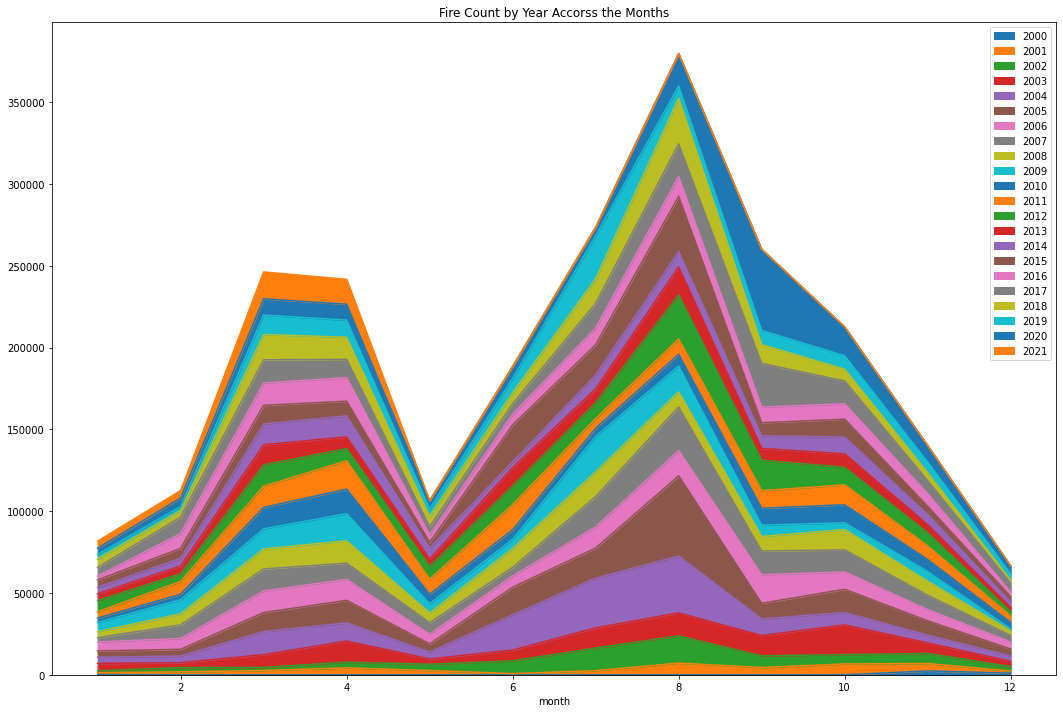

In [20]:
# Fire frequency by month and year
fireByMonthYear = fireData\
    .groupBy("month")\
    .pivot("year")\
    .count()\
    .orderBy("month")

fireByMonthYear.show()

# Visualization of fire frequency by year accross months
pdDF2 = fireByMonthYear.toPandas()
pdDF2.set_index('month', inplace = True)
pdDF2.head()
pdDF2.plot.area(title = 'Fire Count by Year Accorss the Months',
                figsize = (18, 12))

# Observations:
# We can see consistent patterns over the years:
# Fires increase from Dec to Mar, then decrease in spring time
# Fires increase in the summer, and July, August, and Sptember are the peak months

+----+----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+----+
|year|   1|    2|    3|    4|   5|    6|    7|    8|    9|   10|   11|  12|
+----+----+-----+-----+-----+----+-----+-----+-----+-----+-----+-----+----+
|2000|null| null| null| null|null| null| null| null| null| null| 2373|1025|
|2001|1286| 1809| 2627| 4258|2613|  718| 2546| 7151| 4472| 6641| 4516|1312|
|2002|1151| 2597| 1889| 3477|3848| 7828|13817|16628| 7071| 5738| 6169|2661|
|2003|4537| 2988| 7822|12921|3230| 6583|12339|14080|12468|18133| 6430|3254|
|2004|3778| 4093|14116|11076|4207|21526|30395|34720|10200| 7542| 4743|3267|
|2005|3856| 4099|11602|13801|4966|16874|18416|49073| 9490|14245| 8770|4281|
|2006|5463| 6627|13204|12797|5904| 6935|12839|15405|17485|10588| 6831|4285|
|2007|2651| 8296|13465| 9936|7105| 5214|18673|26640|14487|13524| 8794|4003|
|2008|3649| 6798|12257|13670|5920|11542|15098| 9268| 8893|12421| 8612|2787|
|2009|5634| 8605|12254|16587|5624| 5577|21626|15817| 6881| 4124| 5887|1188|
|2010|2682| 

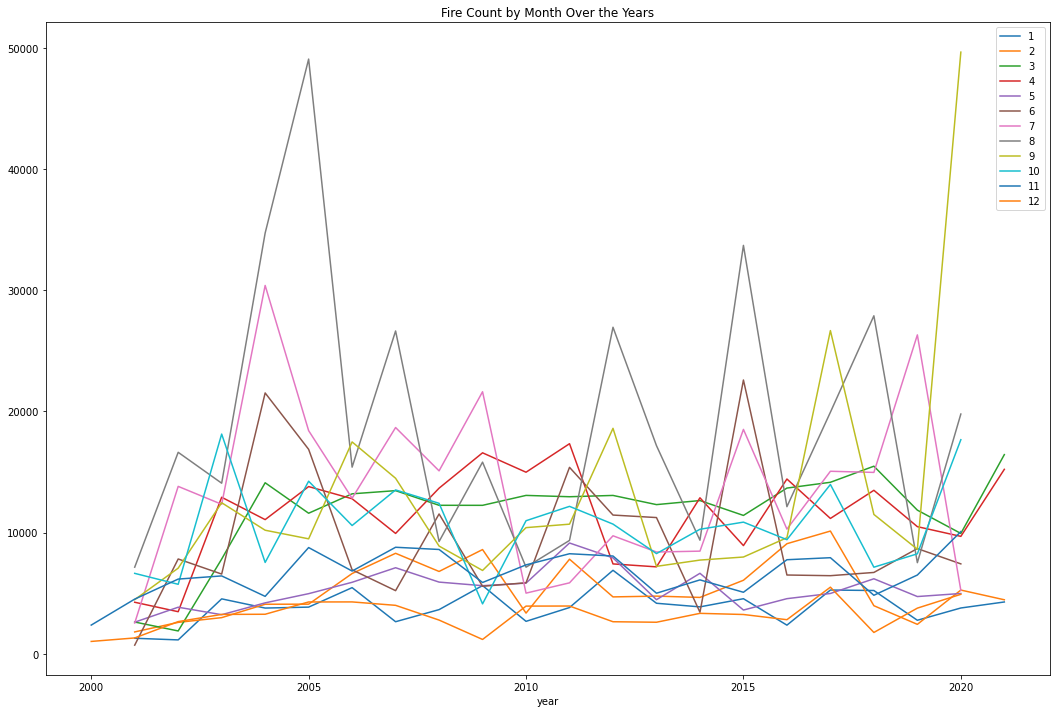

In [21]:
# Fire frequency by month and year
fireByYearMonth = fireData\
    .groupBy("year")\
    .pivot("month")\
    .count()\
    .orderBy("year")

fireByYearMonth.show(22)

# Visualization of fire frequency by month over the years
pdDF3 = fireByYearMonth.toPandas()
pdDF3.set_index('year', inplace = True)
pdDF3.head()
pdDF3.plot(kind = 'line',
           title = 'Fire Count by Month Over the Years',
           figsize = (18, 12))

# Obvervations: 
# We see high fluctuations in fire frequences for summer month: July to September
# We see relatively lower fluctuations in fire frequences for winter months: November to February

+---------+----+-----+-----+
|georegion|year|month|count|
+---------+----+-----+-----+
|  40,-125|2020|    9|16688|
|  45,-120|2015|    8|13300|
|  65,-150|2004|    8|11813|
|  60,-160|2005|    8|10864|
|  65,-145|2005|    8| 9506|
|  35,-125|2020|    9| 9034|
|  65,-150|2004|    7| 8952|
|  45,-115|2007|    8| 8638|
|  65,-145|2019|    7| 8431|
|  35,-120|2020|    9| 8380|
|  65,-150|2005|    8| 8178|
|  35,-125|2020|    8| 8131|
|  65,-150|2004|    6| 7901|
|  40,-125|2018|    8| 7586|
|  60,-145|2004|    8| 7447|
|  40,-125|2017|    8| 7333|
|  35,-100|2009|    4| 6761|
|  45,-115|2017|    9| 6632|
|  40,-120|2012|    8| 6541|
|  65,-155|2015|    7| 6455|
+---------+----+-----+-----+
only showing top 20 rows

75
+---------+------+
|georegion| count|
+---------+------+
|   30,-85|194603|
|   30,-95|156660|
|  35,-100|150301|
|   30,-90|146924|
|  40,-125|143195|
|  45,-120| 95480|
|  30,-100| 85698|
|   35,-95| 81662|
|   25,-85| 81444|
|  35,-125| 80785|
|  45,-115| 66638|
|  40,-12

(2001.0, 2020.0)

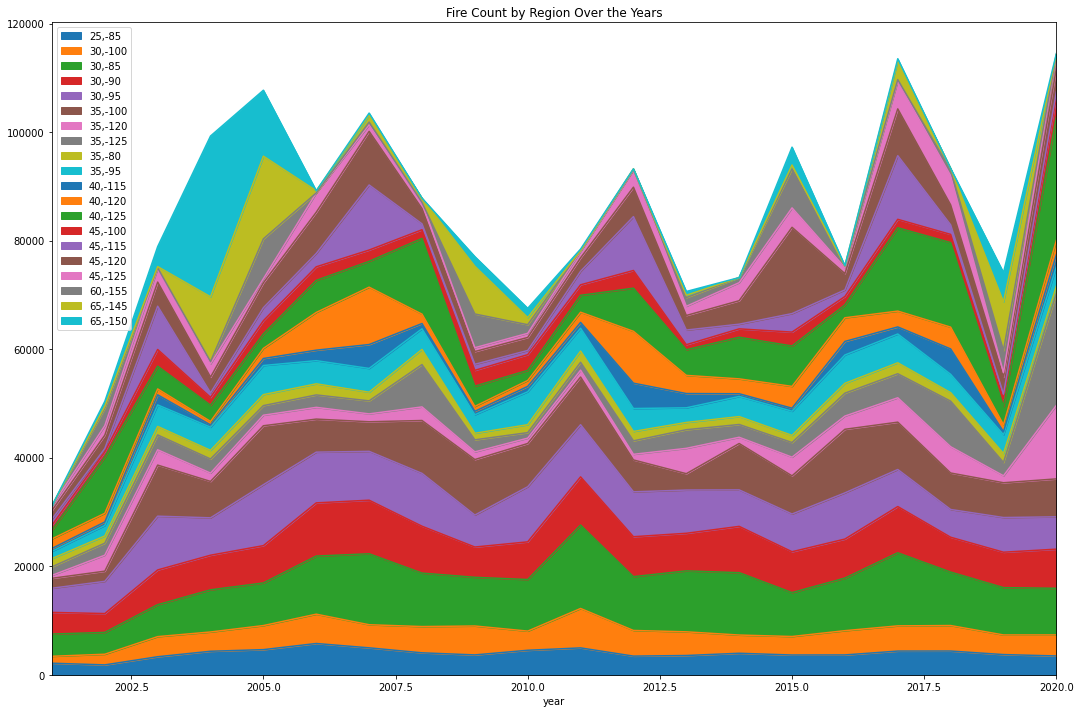

In [ ]:
# Fire frequency by region, year, month
fireByRegion = fireData\
    .withColumn("latRange", floor(col("latitude")/5) * 5)\
    .withColumn("lngRange", floor(col("longitude")/5) * 5)\
    .select(concat(col("latRange"), lit(","), col("lngRange")).alias("georegion"), "year", "month")\
    .groupBy("georegion", "year", "month")\
    .count()\
    .orderBy(desc("count"))

fireByRegion.show()

print(fireByRegion.select("georegion").distinct().count())

# Extract data of 20 regions with most fire occurrence
fireMostRegion = fireByRegion\
    .groupBy("georegion")\
    .sum("count")\
    .withColumnRenamed("sum(count)", "count")\
    .orderBy(desc("count"))\
    .limit(20)

fireMostRegion.show()

regionList = fireMostRegion\
  .select("georegion")\
  .collect()

regionArray = [row.georegion for row in regionList]

fireByRegionTop20 = fireByRegion\
    .where(col("georegion").isin(regionArray))

fireByRegionTop20.show()

# Fire frequency by region, year
fireByRegionYear = fireByRegionTop20\
    .groupBy("year")\
    .pivot("georegion")\
    .sum("count")\
    .where(~col("year").isin([2000, 2021]))\
    .orderBy("year")

fireByRegionYear.show()

# Visualization of fire frequency by region over the years
pdDF4 = fireByRegionYear.toPandas()
pdDF4.set_index('year', inplace = True)
ax = pdDF4.plot.area(title = 'Fire Count by Region Over the Years',
                figsize = (18, 12))
ax.set_xlim(2001, 2020)

# Observations
# We can see higher fluctuations in fire frequencies in some regions:
# e.g. (40, -125), which is in Northern California region
# We can also see that region (40, -125) sees a substantial increase in fire frequency in year 2020


In [ ]:
# Use Window function to calcualte year over year increase in fire frequency by region
windowSpec = Window\
    .partitionBy("georegion")\
    .orderBy("year")

fireByRegionYoY = fireByRegion\
    .groupBy("georegion", "year")\
    .sum("count")\
    .withColumnRenamed("sum(count)", "count")\
    .withColumn("pyCount", lag(col("count")).over(windowSpec))\
    .withColumn("yearlyChange", col("count") - col("pyCount"))

fireByRegionYoY = fireByRegionYoY\
    .withColumn("yearlyInc", col("yearlyChange")/col("pyCount"))\
    .orderBy(desc("yearlyChange"))

fireByRegionYoY.show()



+---------+----+-----+-------+------------+------------------+
|georegion|year|count|pyCount|yearlyChange|         yearlyInc|
+---------+----+-----+-------+------------+------------------+
|  65,-150|2004|29636|   3682|       25954| 7.048886474741988|
|  40,-125|2020|22766|   3386|       19380| 5.723567631423508|
|  35,-125|2020|20628|   2459|       18169| 7.388775925172834|
|  60,-145|2004|18406|    406|       18000| 44.33497536945813|
|  40,-125|2017|15355|   2365|       12990|5.4926004228329806|
|  35,-120|2020|13552|   1281|       12271| 9.579234972677595|
|  65,-145|2004|11940|    226|       11714| 51.83185840707964|
|  45,-120|2015|15899|   4327|       11572|2.6743702334180726|
|  60,-160|2005|12942|   1747|       11195| 6.408128219805381|
|  45,-115|2017|11729|   1220|       10509| 8.613934426229509|
|  65,-155|2015|10496|      3|       10493|3497.6666666666665|
|  45,-115|2007|11988|   2460|        9528| 3.873170731707317|
|  40,-125|2008|13950|   4759|        9191|1.9312880857

#Fire Intensity Change Analysis

In [22]:
fireData.show()

+--------+---------+----------+----+-----+---+----+----+----+
|latitude|longitude|brightness|year|month|day|hour| frp|type|
+--------+---------+----------+----+-----+---+----+----+----+
| 38.5422| -78.3047|     304.8|2000|   11|  1|   2|40.3|   0|
| 38.5586|  -78.317|     302.3|2000|   11|  1|   2|36.0|   0|
| 38.5451| -78.3107|     309.9|2000|   11|  1|   2|58.8|   0|
| 38.5563| -78.3084|     309.4|2000|   11|  1|   2|54.5|   0|
| 31.3393| -89.9124|     304.9|2000|   11|  1|   4| 8.5|   0|
| 31.8611| -95.2398|     308.3|2000|   11|  1|   4|13.1|   0|
| 31.8636|  -95.226|     308.6|2000|   11|  1|   4|13.4|   0|
| 32.6448| -94.6467|     303.3|2000|   11|  1|   4| 7.4|   0|
| 36.6376| -83.9651|     307.6|2000|   11|  1|   4|39.6|   0|
| 36.6431| -83.9605|     309.4|2000|   11|  1|   4|44.2|   0|
| 36.5423| -83.8422|     306.7|2000|   11|  1|   4|40.9|   0|
| 36.7139| -84.2139|     302.4|2000|   11|  1|   4|32.1|   0|
| 36.7099| -84.2202|     300.9|2000|   11|  1|   4|29.2|   0|
| 38.446

+----+------------------+
|year|          avg(frp)|
+----+------------------+
|2001|   46.422113194323|
|2002| 74.23480116365285|
|2003| 66.14455408693962|
|2004| 69.43059406800494|
|2005| 58.42051569858268|
|2006| 64.65148906330552|
|2007| 76.67234162725504|
|2008| 51.85784249199834|
|2009|  65.1359449564676|
|2010|43.713456382873005|
|2011| 64.27718081142943|
|2012| 80.11212785544957|
|2013| 69.62151406440265|
|2014| 51.23020660972145|
|2015| 67.66675501149393|
|2016|60.714343615425385|
|2017| 69.83004949127975|
|2018| 79.53991828584873|
|2019|54.727906953938465|
|2020|103.46982656388842|
+----+------------------+



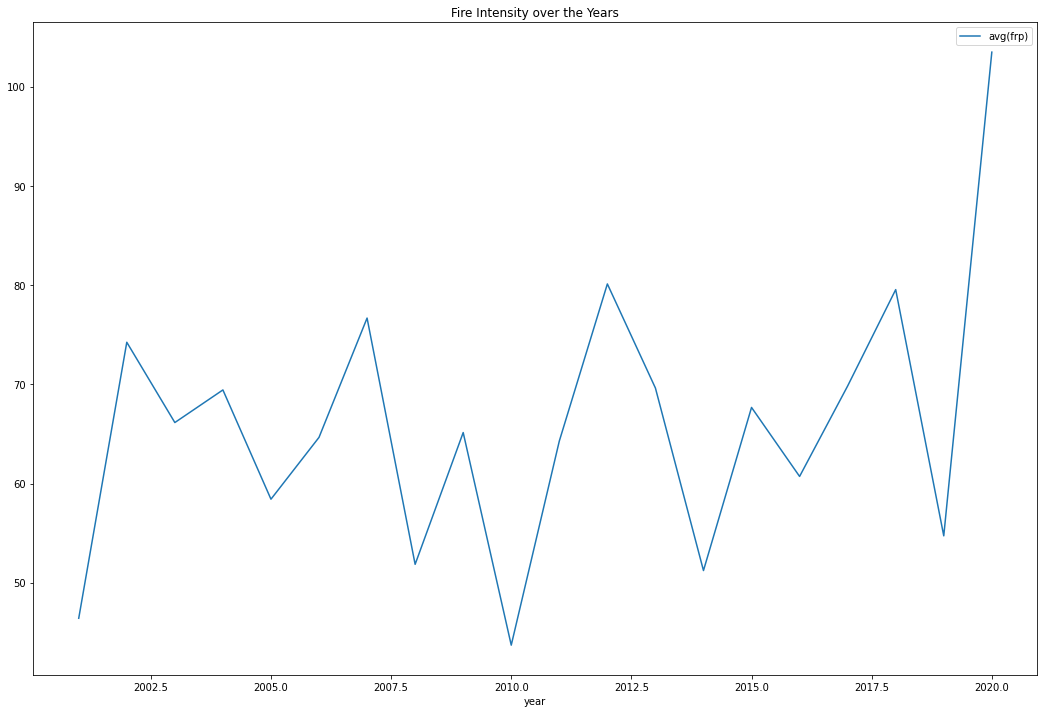

In [24]:
# Fire intensity by year
# We use the attribute field "frp" to measure fire intensity
# frp: Fire Radiative Power (MW - megawatts); 
# frp depicts the pixel-integrated fire radiative power in MW (megawatts).
fireIntensityByYear = fireData\
    .where(~col("year").isin([2000, 2021]))\
    .groupBy("year")\
    .mean("frp")\
    .orderBy("year")

fireIntensityByYear.show(22)

# Visualization of fire intensity by year
pdDF5 = fireIntensityByYear.toPandas()
pdDF5.set_index("year", inplace = True)
pdDF5.head()
pdDF5.plot(kind = "line",
           title = 'Fire Intensity over the Years',
           figsize = (18, 12))

# Observations:
# The average fire intensity fluctuated over the years
# The peaks over the years stayed around 80;
# In 2020 the average frp abnormally increased to over 103

+----+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|year|                 1|                 2|                 3|                 4|                 5|                 6|                 7|                 8|                 9|                10|                11|                12|
+----+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|2000|              null|              null|              null|              null|              null|              null|              null|              null|              null|              null| 26.74475347661186|29.924878048780453|
|2001| 33.14922239502331| 27.59165284687673|25.8687095546250

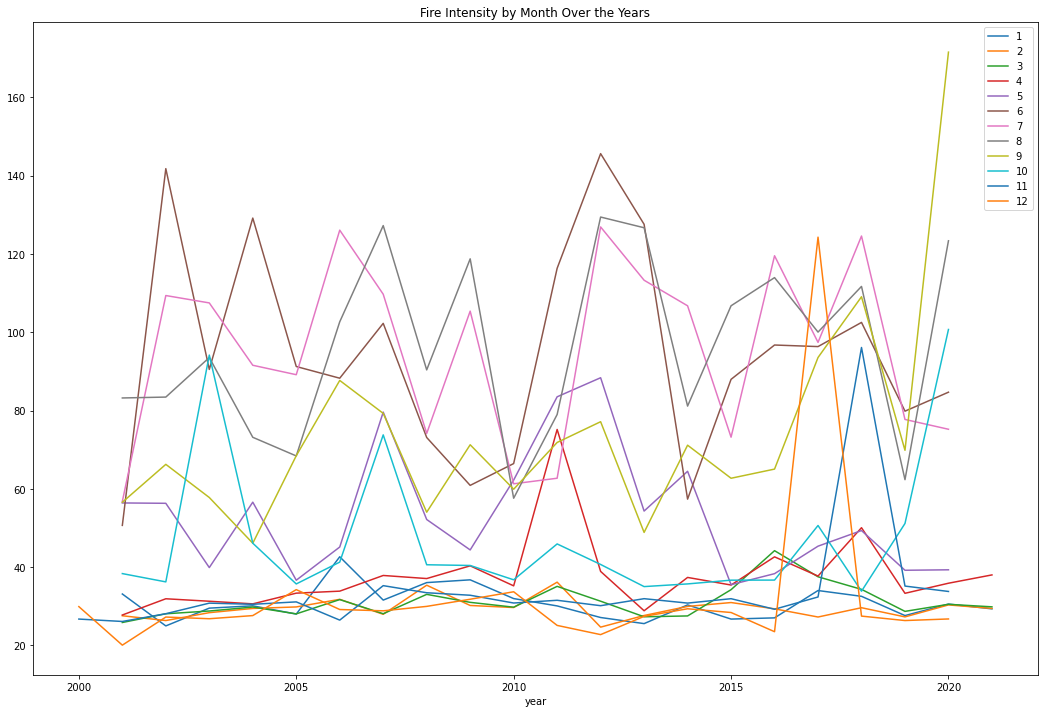

In [26]:
# Fire intensity by month over the years
fireIntensityByYearMonth = fireData\
    .groupBy("year")\
    .pivot("month")\
    .avg("frp")\
    .orderBy("year")

fireIntensityByYearMonth.show()

# Visualization of fire frequency by month over the years
pdDF6 = fireIntensityByYearMonth.toPandas()
pdDF6.set_index('year', inplace = True)
pdDF6.head()
pdDF6.plot(kind = 'line',
           title = 'Fire Intensity by Month Over the Years',
           figsize = (18, 12))

# Observations:
# Fire intensity peaked in June through September
# Fire intensity stayed relatively low and stable in winter months

In [30]:
# Fire intensity by region, year, month
fireIntensityByRegion = fireData\
    .withColumn("latRange", floor(col("latitude")/5) * 5)\
    .withColumn("lngRange", floor(col("longitude")/5) * 5)\
    .select(concat(col("latRange"), lit(","), col("lngRange")).alias("georegion"), "year", "month", "frp")\
    .groupBy("georegion", "year", "month")\
    .mean("frp")\
    .orderBy(desc("avg(frp)"))

fireIntensityByRegion.show()

print(fireIntensityByRegion.select("georegion").distinct().count())

# Extract data of 20 regions with most fire intensity
fireTopIntensityRegion = fireIntensityByRegion\
    .groupBy("georegion")\
    .mean("avg(frp)")\
    .withColumnRenamed("avg(avg(frp))", "avg(frp)")\
    .orderBy(desc("avg(frp)"))\
    .limit(20)

fireTopIntensityRegion.show()

regionList2 = fireTopIntensityRegion\
  .select("georegion")\
  .collect()

regionArray2 = [row.georegion for row in regionList2]

fireIntensityByRegionTop20 = fireIntensityByRegion\
    .where(col("georegion").isin(regionArray2))

fireIntensityByRegionTop20.show()

# Fire intensity by region, year
fireIntensityByRegionYear = fireIntensityByRegionTop20\
    .groupBy("year")\
    .pivot("georegion")\
    .mean("avg(frp)")\
    .withColumnRenamed("avg(avg(frp))", "avg(frp)")\
    .where(~col("year").isin([2000, 2021]))\
    .orderBy("year")

fireIntensityByRegionYear.show()

# Visualization of fire intensity by region over the years
# pdDF7 = fireIntensityByRegionYear.toPandas()
# pdDF7.set_index('year', inplace = True)
# ax = pdDF7.plot(kind = "line",
                # title = 'Fire Intensity by Region Over the Years',
                # figsize = (18, 12))
# ax.set_xlim(2001, 2020)

+---------+----+-----+------------------+
|georegion|year|month|          avg(frp)|
+---------+----+-----+------------------+
|  30,-125|2007|    8|            1036.9|
|  55,-160|2005|    6| 737.7333333333332|
|  45,-110|2013|    6|           734.225|
|  40,-110|2007|    6| 581.5594202898551|
|  45,-115|2012|    6| 484.3268965517241|
|  40,-115|2009|    8|471.66858974358956|
|  60,-150|2003|    7|  470.536923076923|
|  30,-120|2002|    6| 460.0530973451327|
|  40,-115|2002|    6| 428.2351351351351|
|  40,-110|2020|    9| 407.1039686428222|
|  15,-160|2003|    7|404.24545454545455|
|  30,-125|2004|    6|397.00377358490573|
|  35,-110|2013|    7| 396.7709677419354|
|  40,-115|2012|    6| 391.1099221789887|
|   45,-95|2011|    9|374.89900662251637|
|  30,-120|2002|    8| 372.1396396396398|
|  60,-155|2007|    6| 357.5828767123287|
|  35,-120|2015|    6|344.53181818181844|
|  30,-115|2013|    6| 344.2286956521738|
|  30,-120|2016|    8| 336.9526881720426|
+---------+----+-----+------------

In [31]:
# Use Window function to calcualte year over year increase in fire intensity by region
windowSpec = Window\
    .partitionBy("georegion")\
    .orderBy("year")

fireIntensityByRegionYoY = fireIntensityByRegion\
    .groupBy("georegion", "year")\
    .mean("avg(frp)")\
    .withColumnRenamed("avg(avg(frp))", "avg(frp)")\
    .withColumn("pyavg(frp)", lag(col("avg(frp)")).over(windowSpec))\
    .withColumn("yearlyChange", col("avg(frp)") - col("pyavg(frp)"))

fireIntensityByRegionYoY = fireIntensityByRegionYoY\
    .withColumn("yearlyInc", col("yearlyChange")/col("pyavg(frp)"))\
    .orderBy(desc("yearlyChange"))

fireIntensityByRegionYoY.show()

+---------+----+------------------+------------------+------------------+------------------+
|georegion|year|          avg(frp)|        pyavg(frp)|      yearlyChange|         yearlyInc|
+---------+----+------------------+------------------+------------------+------------------+
|  55,-160|2005| 392.7333333333333|               3.3| 389.4333333333333|  118.010101010101|
|  30,-125|2007|182.78951013513517|15.266666666666667| 167.5228434684685|10.973112017585272|
|  15,-160|2003| 166.8437575757576|              43.0|123.84375757575759|2.8800873854827347|
|  60,-155|2007|123.09776678260457|19.416666666666668| 103.6811001159379| 5.339799147601951|
|  65,-150|2003| 158.3768971882817| 56.06365608076205|102.31324110751964| 1.824947715863074|
|  55,-155|2009|127.73333333333332|26.400000000000002|101.33333333333331|3.8383838383838373|
|  30,-125|2009|127.79493447293453|28.685714285714287| 99.10922018722025|  3.45500269576963|
|  65,-155|2018| 98.23970293420818| 6.108333333333333| 92.131369600874